In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

In [2]:
train = pd.read_csv(os.path.join('../input/titanic','train.csv'))
test = pd.read_csv(os.path.join('../input/titanic','test.csv'))

In [3]:
test_Passengerid = test['PassengerId']   # Will be Required for the Submission

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test['Survived'] = np.nan
data = train.append(test,ignore_index = True)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.drop(['PassengerId','Name'],inplace=True,axis = 1)  # Common Ones to remove

Text(0, 0.5, '# Number of Feature with desired no.of counts')

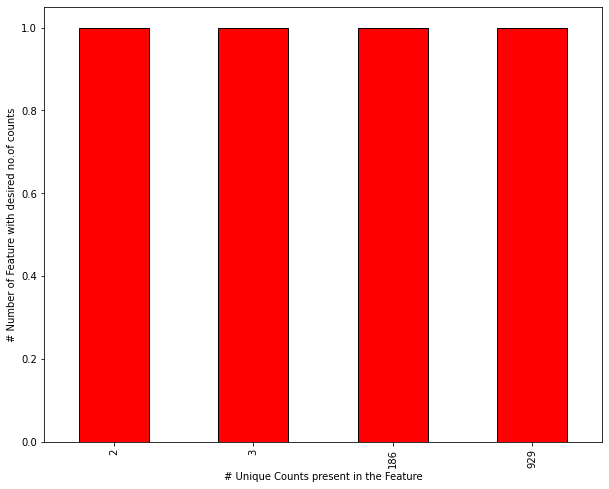

In [10]:
data.select_dtypes('object').nunique().value_counts().sort_index().plot(kind = 'bar',edgecolor = 'black',color = 'red',figsize = (10,8))
plt.xlabel("# Unique Counts present in the Feature")
plt.ylabel("# Number of Feature with desired no.of counts")

In [11]:
from sklearn.preprocessing import LabelEncoder
columns = data.select_dtypes('object').columns
data[columns] = data.select_dtypes('object').apply(LabelEncoder().fit_transform)  # One direct way of Encoding 
# Another Way : OneHotEncoder().fit_transform(df) or LabelEncoder().fit_transform(df)

In [12]:
# Lets Reduce the Size of the dataset

def Reduce_Me(dataset):
    Initial = data.memory_usage().sum()/ 1024**2
    print("Initial Memory : {:.2f} MB".format(Initial))
    Columns = dataset.columns
    for column in Columns:
        Dtype = str(data[column].dtype)
        
        min_ = data[column].min()
        max_ = data[column].max()
            
        if 'int' in Dtype:
            if min_ > np.iinfo(np.int8).min and max_ < np.iinfo(np.int8).max:
                data[column] = data[column].astype(np.int8)
            elif min_ > np.iinfo(np.int16).min and max_ < np.iinfo(np.int16).max:
                data[column] = data[column].astype(np.int16)
            elif min_ > np.iinfo(np.int32).min and max_ < np.iinfo(np.int32).max:
                data[column] = data[column].astype(np.int32)
            elif min_ > np.iinfo(np.int64).min and max_ < np.iinfo(np.int64).max:
                data[column] = data[column].astype(np.int64)
        else:
            if min_ > np.finfo(np.float16).min and max_ < np.finfo(np.float16).max:
                data[column] = data[column].astype(np.float16)
            elif min_ > np.finfo(np.float32).min and max_ < np.finfo(np.float32).max:
                data[column] = data[column].astype(np.float32)
            elif min_ > np.finfo(np.float64).min and max_ < np.finfo(np.float64).max:
                data[column] = data[column].astype(np.float64)
    Final = data.memory_usage().sum()/1024**2
    print("Final Memory : {:.2f} MB".format(Final))
    print("Reduced By: {:.2f}%".format((Initial-Final)/Initial * 100))
    return dataset
        

In [13]:
data = Reduce_Me(data)

Initial Memory : 0.10 MB
Final Memory : 0.02 MB
Reduced By: 81.15%


In [14]:
data.dtypes

Survived    float16
Pclass         int8
Sex            int8
Age         float16
SibSp          int8
Parch          int8
Ticket        int16
Fare        float16
Cabin         int16
Embarked       int8
dtype: object

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='Survived'>

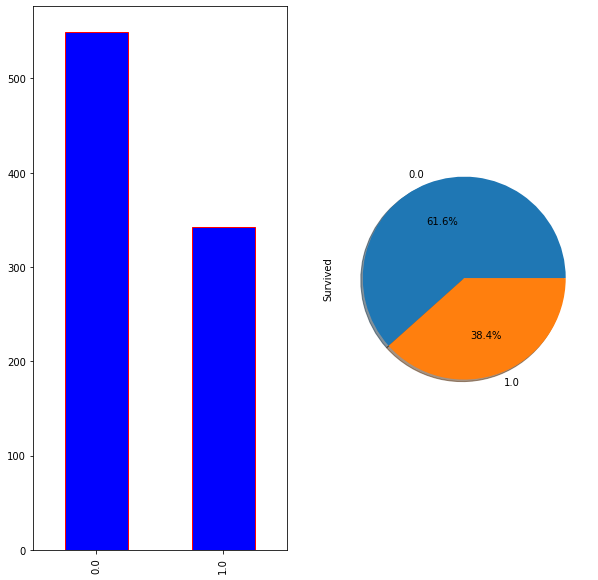

In [15]:
# Lets Plot Distribution of Target Variable

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
data['Survived'].value_counts().sort_index().plot(kind = 'bar',color = 'blue',edgecolor = 'red',figsize = (10,10))
plt.subplot(1,2,2)
data['Survived'].value_counts().sort_index().plot(kind = 'pie',labels = np.sort(np.unique(data['Survived'])),autopct='%1.1f%%',
                                                    shadow = True,figsize = (10,10))

# Classes are Imbalanced 

<AxesSubplot:>

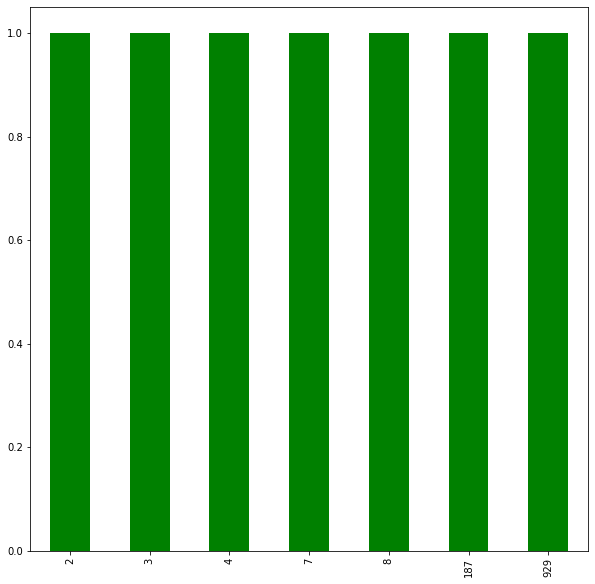

In [16]:
# Lets Plot the Distribution of Integer Columns
col = [col for col in data if 'int' in str(data[col].dtype)]
data[col].nunique().value_counts().sort_index().plot(kind = 'bar',color = 'green',figsize = (10,10))

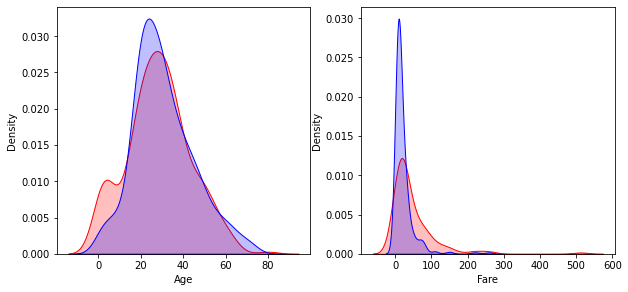

In [17]:
# Lets plot the Distribution of Floating Points
col = [col for col in data if 'float' in str(data[col].dtype) and col != "Survived"]
plt.figure(figsize = (10,10))
color = {1:"red",0:"blue"}
for idx,colm in enumerate(col):
    ax = plt.subplot(2,2,idx+1)
    for class_,col in color.items():
        df = data.loc[data['Survived'] == class_,colm]
        sns.kdeplot(df,color = col,ax = ax,fill=True,legend="Class: "+ str(class_))
        


In [18]:
Labels = data.loc[data['Survived'].notnull(),'Survived']

In [19]:
Labels

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float16

In [20]:
# Lets check for Null Values
Null = pd.DataFrame(data.isnull().sum()).rename(columns = {0:"Total"})
Null["Percentage"] = Null["Total"]/len(data)
Null.sort_values('Percentage',ascending = False).head(10)

,Total,Percentage
Survived,418,0.319328
Age,263,0.200917
Fare,1,0.000764
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Cabin,0,0.000000
Embarked,0,0.000000


Mean: 29.875,Median: 28.0


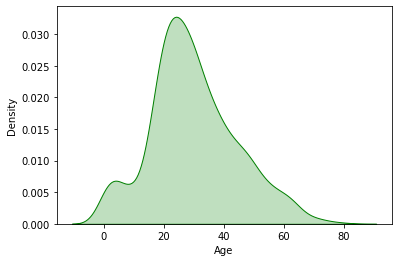

In [21]:
sns.kdeplot(data['Age'],color = 'green',fill = True)
print("Mean: {0},Median: {1}".format(data['Age'].mean(),data['Age'].median()))

# Bit Right Skewed Because Median is smaller then Mean. So we should fill the null values by Median.

In [22]:
# Feature Engineering.
# 1. Lets remove Highly Correlated Features First
Correlation_Matrix = data.corr()
Upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape),k = 1).astype(np.bool))
Redundant = [Col for Col in Upper if np.any(Upper[Col].abs() >= 0.95)]

In [23]:
# 2. Lets Automatically Create Some Features

es = ft.EntitySet(id = "Titanic")
es = es.entity_from_dataframe(entity_id = "Data",dataframe=data,make_index=True,index = "TitanicID")

In [24]:
es

Entityset: Titanic
  Entities:
    Data [Rows: 1309, Columns: 11]
  Relationships:
    No relationships

In [25]:
es["Data"].variables

[<Variable: TitanicID (dtype = index)>,
 <Variable: Survived (dtype = numeric)>,
 <Variable: Pclass (dtype = numeric)>,
 <Variable: Sex (dtype = numeric)>,
 <Variable: Age (dtype = numeric)>,
 <Variable: SibSp (dtype = numeric)>,
 <Variable: Parch (dtype = numeric)>,
 <Variable: Ticket (dtype = numeric)>,
 <Variable: Fare (dtype = numeric)>,
 <Variable: Cabin (dtype = numeric)>,
 <Variable: Embarked (dtype = numeric)>]

In [26]:
feature_matrix,feature_dfs = ft.dfs(entityset=es,target_entity="Data",trans_primitives=["add_numeric","cum_mean"])

In [27]:
Target_Seperate = feature_matrix["Survived"]
Remove_col = []
for col in feature_matrix:
    if "Survived" in str(col):
        Remove_col.append(col)

In [28]:
feature_matrix.drop(Remove_col,axis = 1,inplace = True)

In [29]:
del data
Correlation_Matrix = feature_matrix.corr()
Upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape),k = 1).astype(np.bool))
Redundant = [Col for Col in Upper if np.any(Upper[Col].abs() >= 0.95)]

In [30]:
feature_matrix.drop(Redundant,axis = 1,inplace = True)

In [31]:
feature_matrix.shape
feature_matrix["Survived"] = Target_Seperate
del Target_Seperate

In [32]:
Train = feature_matrix.loc[feature_matrix['Survived'].notnull(),:]
Test = feature_matrix.loc[feature_matrix['Survived'].isnull(),:]

In [33]:
Train.drop(["Survived"],axis = 1,inplace = True)
Test.drop(["Survived"],axis = 1,inplace = True)


In [34]:
Features = Train.columns

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score,make_scorer

pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),("Scaler",StandardScaler())])
score_fn = make_scorer(roc_auc_score,greater_is_better=True)

In [36]:
train = pipeline.fit_transform(Train)
test = pipeline.transform(Test)

In [37]:
# Now Lets Start machine Learning Models
# Lets use Random Forest as Our base Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100,random_state=20,n_jobs=-1)
cv_score = cross_val_score(model,train,Labels,cv = 10,scoring=score_fn)

In [38]:
print("10 Fold Cross Validation ROC_AUC_SCORE: {0} with Deviation: {1}".format(round(cv_score.mean(),3),round(cv_score.std(),3)))

10 Fold Cross Validation ROC_AUC_SCORE: 0.786 with Deviation: 0.041


In [39]:
model.fit(train,Labels)
feature_Importance = pd.DataFrame({"Features":Features,"Importance":model.feature_importances_})

In [40]:
def Plot_Feature_Importance(df,count = 5,threshold = None):
    df["Importance"] = df["Importance"]/df["Importance"].sum()   # Normalizing Stuff
    df = df.sort_values("Importance",ascending = False).reset_index(drop = True)
    df["Cum_Sum"] = np.cumsum(df["Importance"])
    
    # Plotting Count Important Features
    df.loc[:count,:].plot(kind = "barh",x = "Features",y = "Importance",color = "blue",edgecolor = "black",linewidth = 2)
    plt.xlabel("Normalized Importance",size = 10)
    plt.gca().invert_yaxis() 
   # plt.gca().invert_xaxis()
    # Simply Invert the Y axis. If u uncomment this line the Max Important feature will be at bottom and least one on top.
    plt.show()
    
    if threshold:
        plt.plot(np.arange(len(df)),df["Cum_Sum"],"r-")
        plt.xlabel('# Features', size = 10)
        plt.ylabel('Cumulative Importance', size = 10)
        plt.title('Cumulative Importance of Features', size = 10)
        
        min_ = np.min(np.where(df["Cum_Sum"] > threshold))
        
        plt.vlines(min_+1,ymin=0,ymax=2,colors="black",linestyles="--")
        print("Number of Features Required for threshold: {} is {}".format(threshold,min_+1))
        
    plt.show()
    return df
    

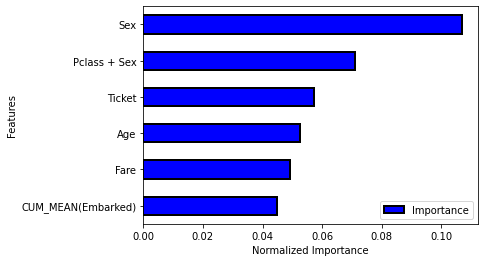

Number of Features Required for threshold: 0.9 is 21


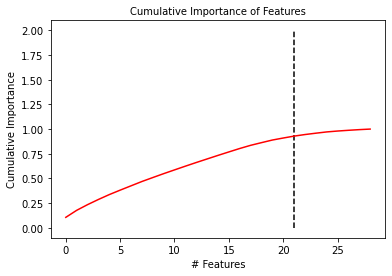

In [41]:
Normalized_Feature_Importance = Plot_Feature_Importance(feature_Importance,count=5,threshold=0.9)

In [42]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore',category=ConvergenceWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=UserWarning)

Result = pd.DataFrame(columns = ["Model","CV_Mean","CV_Std"])

def Get_Best_Model(model,train,target,Name,model_result = False):
    global Result
    cv_score = cross_val_score(model,train,target,cv=10,scoring=score_fn,n_jobs=-1)
    print("For Model: {0} 10 Fold Cross Validation ROC_AUC_SCORE: {1} with Deviation: {2}".format(Name,round(cv_score.mean(),3),round(cv_score.std(),3)))
    
    if model_result:
        Result = Result.append(pd.DataFrame({"Model":Name,"CV_Mean":round(cv_score.mean(),3),"CV_Std":round(cv_score.std(),3)},index = [0]),ignore_index=True)
        return Result
    

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

model_forest = RandomForestClassifier(n_estimators= 100,random_state=10,n_jobs=-1)
model_logistic = LogisticRegression(n_jobs=-1)
model_svm = SVC()
model_NN = MLPClassifier(hidden_layer_sizes=[100,100,100],early_stopping=True)

In [44]:
train.shape

(891, 29)

In [45]:
Labels.shape

(891,)

In [46]:
Result = Get_Best_Model(model_forest,train,Labels,"RandomForest",model_result=True)

For Model: RandomForest 10 Fold Cross Validation ROC_AUC_SCORE: 0.799 with Deviation: 0.044


In [47]:
Result = Get_Best_Model(model_logistic,train,Labels,"LogistikRegression",model_result=True)

For Model: LogistikRegression 10 Fold Cross Validation ROC_AUC_SCORE: 0.771 with Deviation: 0.037


In [48]:
Result = Get_Best_Model(model_svm,train,Labels,"SVM",model_result=True)

For Model: SVM 10 Fold Cross Validation ROC_AUC_SCORE: 0.782 with Deviation: 0.042


In [49]:
for n in [5,10,15,20]:
    model_knn = KNeighborsClassifier(n_neighbors=n)
    Result = Get_Best_Model(model_knn,train,Labels,f"KNN_{n}",model_result=True)

For Model: KNN_5 10 Fold Cross Validation ROC_AUC_SCORE: 0.766 with Deviation: 0.047
For Model: KNN_10 10 Fold Cross Validation ROC_AUC_SCORE: 0.757 with Deviation: 0.044
For Model: KNN_15 10 Fold Cross Validation ROC_AUC_SCORE: 0.775 with Deviation: 0.057
For Model: KNN_20 10 Fold Cross Validation ROC_AUC_SCORE: 0.767 with Deviation: 0.047


In [50]:
Result = Get_Best_Model(model_NN,train,Labels,"NeuralNet",model_result=True)

For Model: NeuralNet 10 Fold Cross Validation ROC_AUC_SCORE: 0.76 with Deviation: 0.068


In [51]:
Result.set_index("Model",inplace = True)

<AxesSubplot:xlabel='Model'>

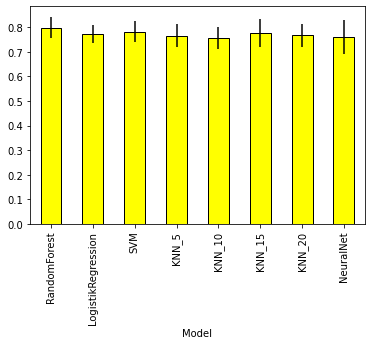

In [52]:
Result["CV_Mean"].plot(kind = "bar",edgecolor = "black",color = "yellow",yerr = list(Result["CV_Std"]))

In [53]:
# Random Forest Wins the race. Now lets do Hyperparameter Optimization for it using Hyperopt
from hyperopt import STATUS_OK

def ObjectiveFunction(params):
    model = RandomForestClassifier(**params,n_jobs = -1)
    score = cross_val_score(model,train,Labels,cv = 10,n_jobs=-1,scoring=score_fn)
    loss = 1 - np.mean(score)
    return {'loss':loss,'params':params,'status':STATUS_OK}
    

In [54]:
from hyperopt import hp
space = {
    'n_estimators':hp.choice('n_estimators',range(10,1000)),
    'max_depth':hp.choice('max_depth',range(1,50)),
    'max_features':hp.choice('max_features',['auto','sqrt','log2']),
    'max_leaf_nodes':hp.choice('max_leaf_nodes',range(10,150))
}

In [55]:
from hyperopt import Trials

bayes_trial = Trials()

In [56]:
from hyperopt import fmin,tpe
best = fmin(fn = ObjectiveFunction,space = space,algo = tpe.suggest,max_evals=100,trials=bayes_trial)
# We could also use lambda function in fn as: fn = lambda x: Squrt(x,a,b...) thats also one of the way

100%|██████████| 100/100 [11:30<00:00,  6.91s/trial, best loss: 0.19788557847381372]


In [57]:
[print(t['result'],end = '\n\n') for t in bayes_trial.trials]

{'loss': 0.21975568004979773, 'params': {'max_depth': 17, 'max_features': 'log2', 'max_leaf_nodes': 73, 'n_estimators': 33}, 'status': 'ok'}

{'loss': 0.21749823161587867, 'params': {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 92, 'n_estimators': 486}, 'status': 'ok'}

{'loss': 0.2042453951277481, 'params': {'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': 124, 'n_estimators': 939}, 'status': 'ok'}

{'loss': 0.20355020796197276, 'params': {'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': 97, 'n_estimators': 932}, 'status': 'ok'}

{'loss': 0.20896273660979536, 'params': {'max_depth': 14, 'max_features': 'log2', 'max_leaf_nodes': 127, 'n_estimators': 855}, 'status': 'ok'}

{'loss': 0.23376255552726144, 'params': {'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 19, 'n_estimators': 584}, 'status': 'ok'}

{'loss': 0.23644781144781146, 'params': {'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 92, 'n_estimators': 55}, 'status': 'ok'}

{'l

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [58]:
from hyperopt import space_eval
params = space_eval(space,best)    # These are the best parameters

In [59]:
Best_model = RandomForestClassifier(**params,n_jobs = -1)

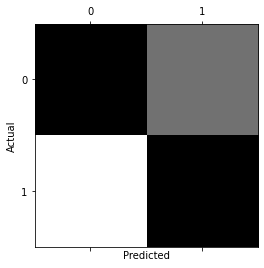

In [60]:
# Lets calculate the Confusion matrix and See hows the result
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Y_train_predict = cross_val_predict(Best_model,train,Labels,cv = 10,n_jobs=-1)
Conf = confusion_matrix(Labels,Y_train_predict)
# Lets plot it pictorially to see whats happening
rowsum = Conf.sum(axis = 1,keepdims = True)
norm_Conf = Conf/rowsum

# Lets fill dignol with zeros
np.fill_diagonal(norm_Conf,0)
plt.matshow(norm_Conf,cmap = plt.cm.gray)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# The model is confusing more in cases of 1

In [61]:
# Lets do Prediction on Test Set
Best_model.fit(train,Labels)
Prediction = Best_model.predict(test)

In [62]:
Result_Output = np.hstack((np.array(test_Passengerid).reshape(-1,1),np.array(Prediction).reshape(-1,1).astype(np.int)))
Result_Output = pd.DataFrame(Result_Output,columns = ['PassengerId','Survived'])

In [63]:
Result_Output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [64]:
Result_Output.to_csv("Prediction.csv",index=False)